# 1. 모듈 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/단위프로젝트_1조/EDA

/content/drive/MyDrive/단위프로젝트_1조/EDA


In [ ]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 121.1 MB/s eta 0:00:00


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 116.0 MB/s eta 0:00:00


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt install fonts-nanum

!sudo apt install font-manager
!rm -rf ~/.cache/matplotlib
!pip install koreanize-matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
import folium
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from datetime import datetime
import matplotlib.dates as md
from matplotlib import rc
import koreanize_matplotlib
from datetime import datetime
import matplotlib.dates as md
from pyproj import Transformer
import geopandas as gpd
import os

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,920 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and di

#2. 데이터 불러오기

In [ ]:
csvPath ='/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2022).csv' 
df = pd.read_csv(csvPath)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134498 entries, 0 to 134497
Data columns (total 85 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준_년_코드          134498 non-null  int64  
 1   기준_분기_코드         134498 non-null  int64  
 2   상권_구분_코드         134498 non-null  object 
 3   상권_구분_코드_명       134498 non-null  object 
 4   상권_코드            134498 non-null  int64  
 5   상권_코드_명          134498 non-null  object 
 6   서비스_업종_코드        134498 non-null  object 
 7   서비스_업종_코드_명      134498 non-null  object 
 8   분기당_매출_금액        134498 non-null  int64  
 9   분기당_매출_건수        134498 non-null  int64  
 10  주중_매출_비율         134498 non-null  int64  
 11  주말_매출_비율         134498 non-null  int64  
 12  월요일_매출_비율        134498 non-null  int64  
 13  화요일_매출_비율        134498 non-null  int64  
 14  수요일_매출_비율        134498 non-null  int64  
 15  목요일_매출_비율        134498 non-null  int64  
 16  금요일_매출_비율        134498 non-null  int6

## 2.1. 구별로 저장(영등포구만)

In [ ]:
sgg = '영등포구'                     # sgg 에 구명 대입 
dfs = [df]   # 각 데이터 프레임들 넣고
n = ['추정매출(2022).csv']  # 파일이름
f = '/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출'   # 폴더 경로

for df, filename in zip(dfs, n):   #  dfs 와 n을  df , filename 대입 
    sgg_df = df[df['시군구명'] == sgg]  # 시군구명에 구명 넣고
    new = os.path.join(f, filename.replace('.csv', f'_{sgg}.csv'))  #  파일 이름에 해당 구를 추가하고 폴더 경로와 합해서 새로운 파일 경로를 생성하고 new 대입
    sgg_df.to_csv(new, index=False) #  /content/drive/MyDrive/상권분석/(상권-OOOO)_주소추가_마포구.csv 로 저장

## 2.2. 분기별로 저장(4분기만)

In [ ]:
csvPath ='/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2022)_영등포구.csv' 
ydf = pd.read_csv(csvPath)

In [ ]:
bg = 4                    
dfs = [ydf]
n = ['추정매출(2022)_영등포구.csv']
f = '/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출'

for df, filename in zip(dfs, n):
    bg_df = df[df['기준_분기_코드'] == bg]
    new = os.path.join(f, filename.replace('.csv', f'_{bg}.csv'))
    bg_df.to_csv(new, index=False)

# 3. 데이터 확인 및 전처리

In [ ]:
csvPath = '/content/drive/MyDrive/단위프로젝트_1조/공통전처리/추정매출/추정매출(2022)_영등포구_4.csv'
ydf_4 = pd.read_csv(csvPath)
ydf_4.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,행정동_코드,시군구명,읍면동명,lon,lat
0,2022,4,R,전통시장,2130258,영진시장A동,CS300022,화장품,30620474,1677,...,78,388,258,953,*,11560680,영등포구,신길제6동,126.915951,37.500438
1,2022,4,R,전통시장,2130258,영진시장A동,CS300011,일반의류,914054,45,...,0,0,9,36,*,11560680,영등포구,신길제6동,126.915951,37.500438
2,2022,4,R,전통시장,2130258,영진시장A동,CS300009,청과상,741000000,46796,...,5498,10966,11342,15549,*,11560680,영등포구,신길제6동,126.915951,37.500438
3,2022,4,R,전통시장,2130258,영진시장A동,CS300001,슈퍼마켓,3774000000,191557,...,30969,41222,49045,47196,3,11560680,영등포구,신길제6동,126.915951,37.500438
4,2022,4,R,전통시장,2130258,영진시장A동,CS100001,한식음식점,10884202,489,...,27,72,105,266,*,11560680,영등포구,신길제6동,126.915951,37.500438


In [ ]:
ydf_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년_코드          1578 non-null   int64  
 1   기준_분기_코드         1578 non-null   int64  
 2   상권_구분_코드         1578 non-null   object 
 3   상권_구분_코드_명       1578 non-null   object 
 4   상권_코드            1578 non-null   int64  
 5   상권_코드_명          1578 non-null   object 
 6   서비스_업종_코드        1578 non-null   object 
 7   서비스_업종_코드_명      1578 non-null   object 
 8   분기당_매출_금액        1578 non-null   int64  
 9   분기당_매출_건수        1578 non-null   int64  
 10  주중_매출_비율         1578 non-null   int64  
 11  주말_매출_비율         1578 non-null   int64  
 12  월요일_매출_비율        1578 non-null   int64  
 13  화요일_매출_비율        1578 non-null   int64  
 14  수요일_매출_비율        1578 non-null   int64  
 15  목요일_매출_비율        1578 non-null   int64  
 16  금요일_매출_비율        1578 non-null   int64  
 17  토요일_매출_비율     

## 3.1. 외식업종만 저장

In [ ]:
# 외식업 10개 업종에 해당하는 데이터만 새로운 df에 저장
ujlist = ['커피-음료','호프-간이주점','분식전문점','치킨전문점','패스트푸드점','제과점','양식음식점','일식음식점','중식음식점','한식음식점']
ydf_4_uj = ydf_4[ydf_4['서비스_업종_코드_명'].isin(ujlist)]

In [ ]:
ydf_4_uj['서비스_업종_코드_명'].unique()

array(['한식음식점', '커피-음료', '호프-간이주점', '분식전문점', '중식음식점', '치킨전문점', '패스트푸드점',
       '제과점', '양식음식점', '일식음식점'], dtype=object)

## 3.2. 점포수 결측치 채우고 데이터타입 변경

In [ ]:
# 점포수가 2개 미만인 상권은 매출 노출을 방지하기 위해 *로 대체한 데이터이므로, *를 2로 바꿔준다.
ydf_jps = ydf_4_uj[['서비스_업종_코드_명','점포수','읍면동명']]
ydf_jps.replace({'점포수':'*'},{'점포수':2},inplace=True)
ydf_jps['점포수'].unique()

<ipython-input-15-3ae4e18db49a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ydf_jps.replace({'점포수':'*'},{'점포수':2},inplace=True)


array([2, '5', '3', '7', '34', '4', '10', '6', '11', '37', '24', '12',
       '17', '14', '15', '8', '50', '9', '191', '52', '140', '13', '26',
       '38', '69', '80', '47', '387', '99', '60', '20', '22', '255', '25',
       '73', '55', '21', '36', '28', '40', '246', '30', '33', '35', '23',
       '96', '19', '39', '108', '51', '57', '59', '49', '139', '18', '42',
       '27', '16', '46', '45', '106'], dtype=object)

In [ ]:
# 점포수의 데이터타입을 정수형으로 바꿔준다.
ydf_jps = ydf_jps.astype({'점포수':'int'})
ydf_jps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 4 to 1577
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   서비스_업종_코드_명  412 non-null    object
 1   점포수          412 non-null    int64 
 2   읍면동명         412 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.9+ KB


In [ ]:
ydf_jps.head()

,서비스_업종_코드_명,점포수,읍면동명
4,한식음식점,2,신길제6동
12,커피-음료,5,영등포동
13,호프-간이주점,3,영등포동
14,분식전문점,2,영등포동
15,한식음식점,7,영등포동


# 4. EDA

## 4.1. 외식업종 세부 비율 - 점포수 기준

In [ ]:
ydf_jps_pv = ydf_jps.pivot_table(values='점포수', index = '서비스_업종_코드_명', aggfunc = 'sum').sort_values(by='점포수', ascending=False)
ydf_jps_pv

,점포수
서비스_업종_코드_명,
한식음식점,2418
커피-음료,911
분식전문점,615
호프-간이주점,530
중식음식점,526
일식음식점,221
양식음식점,216
제과점,153
치킨전문점,151


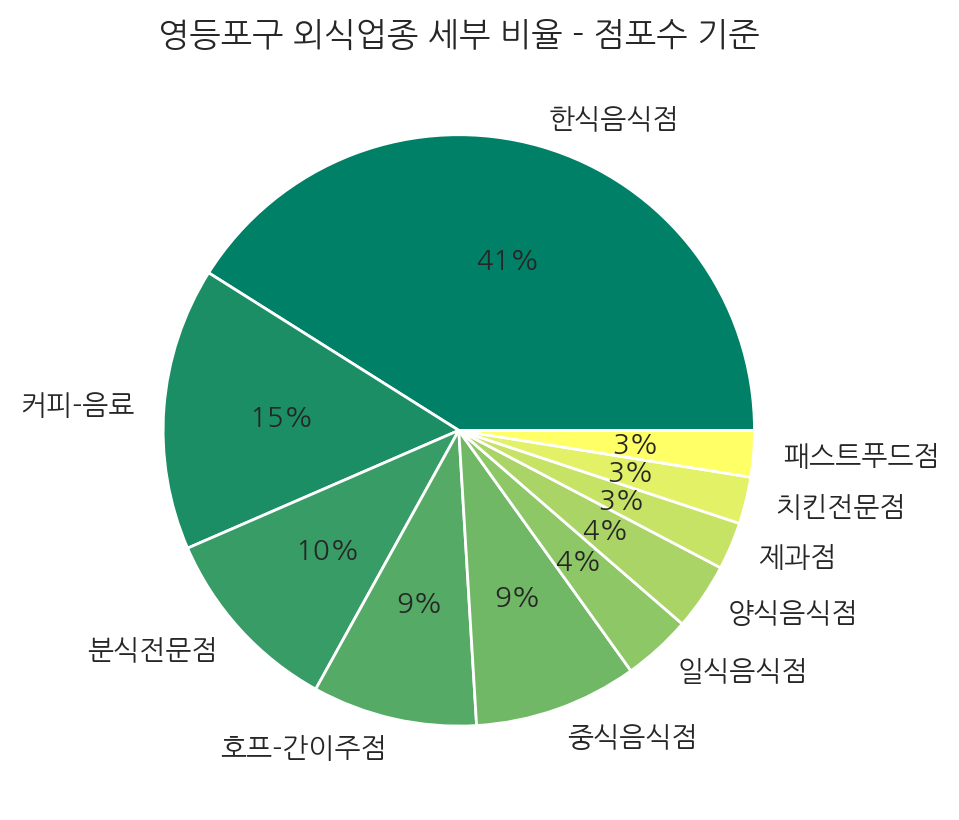

In [ ]:
# 점포수 기준으로 외식업종 비율을 확인함
# 점포수처럼 숫자가 아니라 범주형 컬럼인 경우에는 컬럼명 뒤에 .value_counts()를 붙여주면 빈도수를 그래프로 그릴 수 있음
a = ydf_jps_pv['점포수'].plot.pie(autopct='%1.f%%',colormap = 'summer')
plt.title('영등포구 외식업종 세부 비율 - 점포수 기준')
plt.ylabel(None)
plt.show()

## 4.2. 행정동별 외식업종 점포수

In [ ]:
# 행정동별 외식업종 점포수 전체(분모)
ydf_d_pv = ydf_jps.pivot_table(values='점포수', index = '읍면동명', aggfunc = 'sum').sort_values(by='점포수', ascending=False)
ydf_d = ydf_d_pv.reset_index()
ydf_d

,읍면동명,점포수
0,여의동,1651
1,영등포동,866
2,당산제1동,578
3,문래동,437
4,대림제3동,428
5,당산제2동,382
6,양평제2동,309
7,대림제2동,250
8,신길제1동,180
9,도림동,166


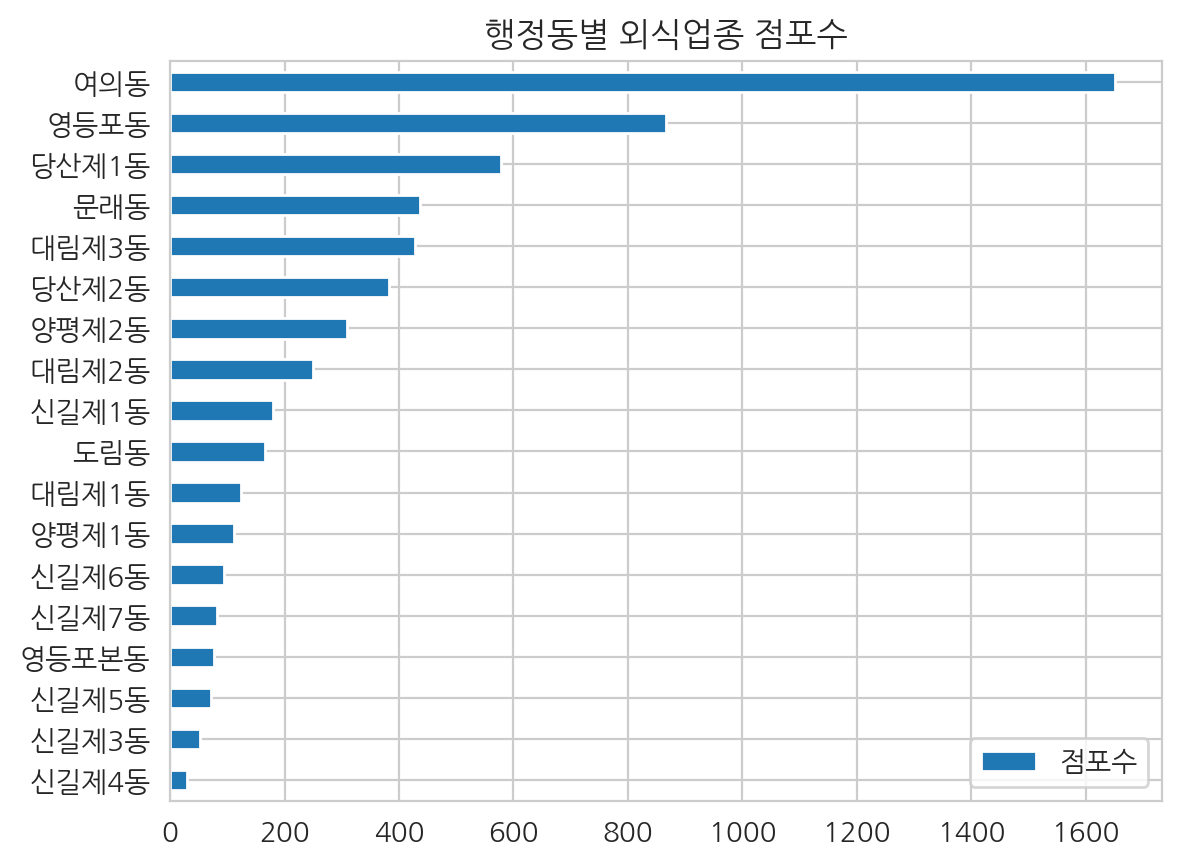

In [ ]:
ydf_d.sort_values(by="점포수",ascending=True).plot('읍면동명','점포수',kind='barh')
plt.title("행정동별 외식업종 점포수")
plt.ylabel(None)
plt.show()

## 4.3. 행정동별 외식업종 구성 비율

In [ ]:
ydf_uj = ydf_jps.pivot_table(values='점포수', index = ['읍면동명','서비스_업종_코드_명'], aggfunc = 'sum').sort_values(by='읍면동명', ascending=False)
ydf_uj = ydf_uj.reset_index()
ydf_uj

,읍면동명,서비스_업종_코드_명,점포수
0,영등포본동,호프-간이주점,12
1,영등포본동,한식음식점,39
2,영등포본동,패스트푸드점,3
3,영등포본동,커피-음료,6
4,영등포본동,중식음식점,10
...,...,...,...
147,당산제1동,커피-음료,99
148,당산제1동,패스트푸드점,22
149,당산제1동,한식음식점,252
150,당산제1동,호프-간이주점,70


In [ ]:
# 4.3.에서 구했던 업종별 전체 점포수를 가져온다.(분모)
new_df = pd.merge(ydf_uj, ydf_d, how='left', on='읍면동명')
new_df

,읍면동명,서비스_업종_코드_명,점포수_x,점포수_y
0,영등포본동,호프-간이주점,12,77
1,영등포본동,한식음식점,39,77
2,영등포본동,패스트푸드점,3,77
3,영등포본동,커피-음료,6,77
4,영등포본동,중식음식점,10,77
...,...,...,...,...
147,당산제1동,커피-음료,99,578
148,당산제1동,패스트푸드점,22,578
149,당산제1동,한식음식점,252,578
150,당산제1동,호프-간이주점,70,578


In [ ]:
new_df['비율'] = new_df['점포수_x']/new_df['점포수_y']*100

In [ ]:
# 비율 컬럼을 만들고 새로운 df에 저장
new_ratio = new_df.drop(['점포수_x','점포수_y'], axis=1)
new_ratio

,읍면동명,서비스_업종_코드_명,비율
0,영등포본동,호프-간이주점,15.584416
1,영등포본동,한식음식점,50.649351
2,영등포본동,패스트푸드점,3.896104
3,영등포본동,커피-음료,7.792208
4,영등포본동,중식음식점,12.987013
...,...,...,...
147,당산제1동,커피-음료,17.128028
148,당산제1동,패스트푸드점,3.806228
149,당산제1동,한식음식점,43.598616
150,당산제1동,호프-간이주점,12.110727


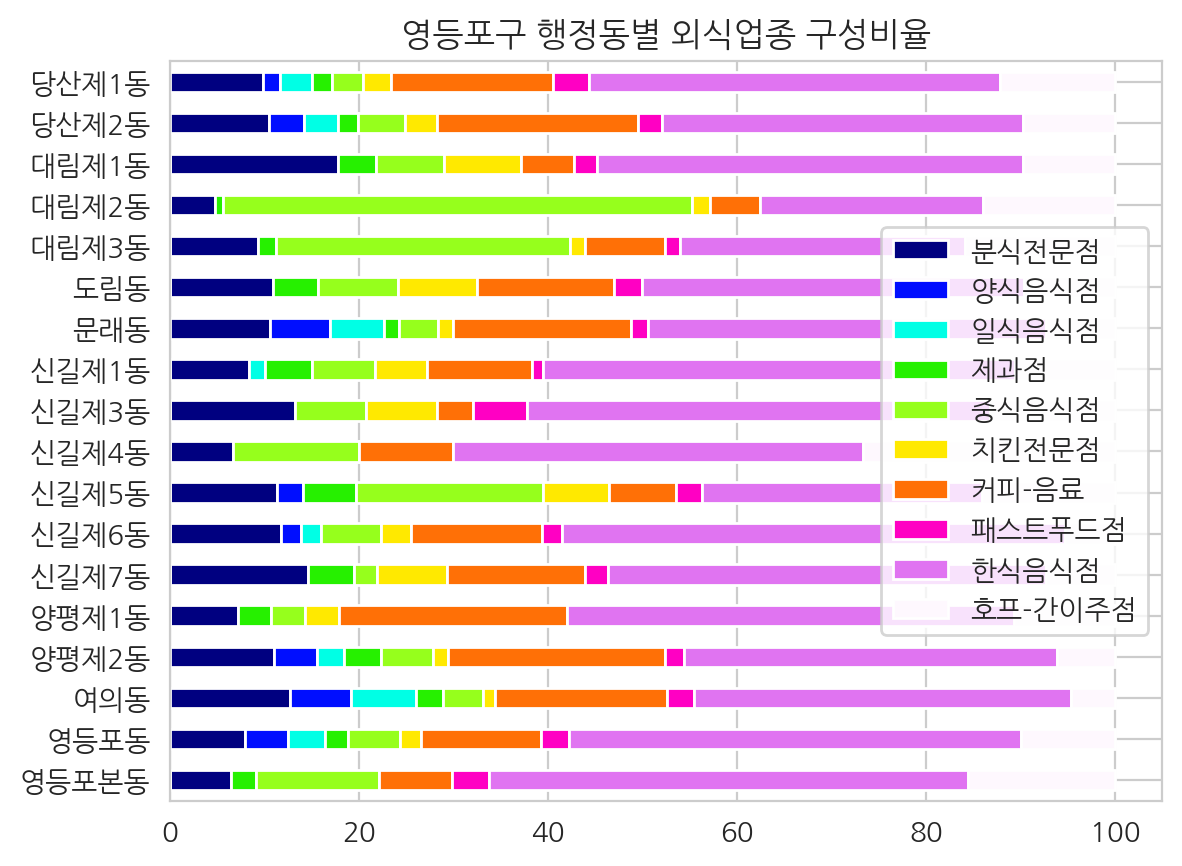

<Figure size 5000x1000 with 0 Axes>

In [ ]:
# 누적막대그래프
pd.pivot_table(data = new_ratio, index = '읍면동명', columns = '서비스_업종_코드_명', values='비율').sort_values(by='읍면동명', ascending=False).plot(kind='barh',colormap ='gist_ncar', stacked=True)
plt.title('영등포구 행정동별 외식업종 구성비율')
plt.ylabel(None)
legend = plt.legend(title='')
plt.figure(figsize=(50,10))
plt.show()

## 4.4. 행정동별 상권 구성

In [ ]:
sg = ydf_4[['읍면동명','상권_구분_코드_명','상권_코드_명']]
sg['cnt']=1
sg

<ipython-input-43-a2e8b117b482>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg['cnt']=1


,읍면동명,상권_구분_코드_명,상권_코드_명,cnt
0,신길제6동,전통시장,영진시장A동,1
1,신길제6동,전통시장,영진시장A동,1
2,신길제6동,전통시장,영진시장A동,1
3,신길제6동,전통시장,영진시장A동,1
4,신길제6동,전통시장,영진시장A동,1
...,...,...,...,...
1573,양평제1동,골목상권,문래중학교,1
1574,양평제1동,골목상권,문래중학교,1
1575,양평제1동,골목상권,문래중학교,1
1576,양평제1동,골목상권,문래중학교,1


In [ ]:
sg_unique = sg.drop_duplicates(subset=['상권_코드_명'])
sg_unique

,읍면동명,상권_구분_코드_명,상권_코드_명,cnt
0,신길제6동,전통시장,영진시장A동,1
5,영등포동,전통시장,영등포시장기계공구상가,1
16,신길제3동,전통시장,신동시장,1
26,영등포동,전통시장,영등포전통시장,1
39,영등포동,전통시장,남서울상가,1
...,...,...,...,...
1489,양평제2동,골목상권,선유도역 6번,1
1507,문래동,골목상권,문래예술촌(문래창작촌),1
1534,문래동,골목상권,문래소공원,1
1542,양평제1동,골목상권,양평역 2번,1


In [ ]:
sg_pv = sg_unique.pivot_table(values='cnt', index=['읍면동명','상권_구분_코드_명'], aggfunc = 'sum')
sg_pv

cnt
읍면동명  상권_구분_코드_명     
당산제1동 골목상권          3
      발달상권          2
      전통시장          2
당산제2동 골목상권          3
      발달상권          2
대림제1동 골목상권          5
      전통시장          1
대림제2동 골목상권          4
      전통시장          2
대림제3동 골목상권          3
      발달상권          2
도림동   골목상권          4
      전통시장          1
문래동   골목상권          5
      발달상권          2
      전통시장          1
신길제1동 골목상권          4
신길제3동 골목상권          2
      전통시장          1
신길제4동 골목상권          2
신길제5동 골목상권          3
신길제6동 골목상권          6
      전통시장          1
신길제7동 골목상권          2
양평제1동 골목상권          2
      발달상권          1
양평제2동 골목상권          3
      전통시장          1
여의동   발달상권          3
영등포동  골목상권          7
      발달상권          3
      전통시장          7
영등포본동 골목상권          4
      전통시장          1

In [ ]:
sggs = sg_pv.reset_index()
sggs

,읍면동명,상권_구분_코드_명,cnt
0,당산제1동,골목상권,3
1,당산제1동,발달상권,2
2,당산제1동,전통시장,2
3,당산제2동,골목상권,3
4,당산제2동,발달상권,2
5,대림제1동,골목상권,5
6,대림제1동,전통시장,1
7,대림제2동,골목상권,4
8,대림제2동,전통시장,2
9,대림제3동,골목상권,3


In [ ]:
sggs.to_excel('sggs.xlsx')

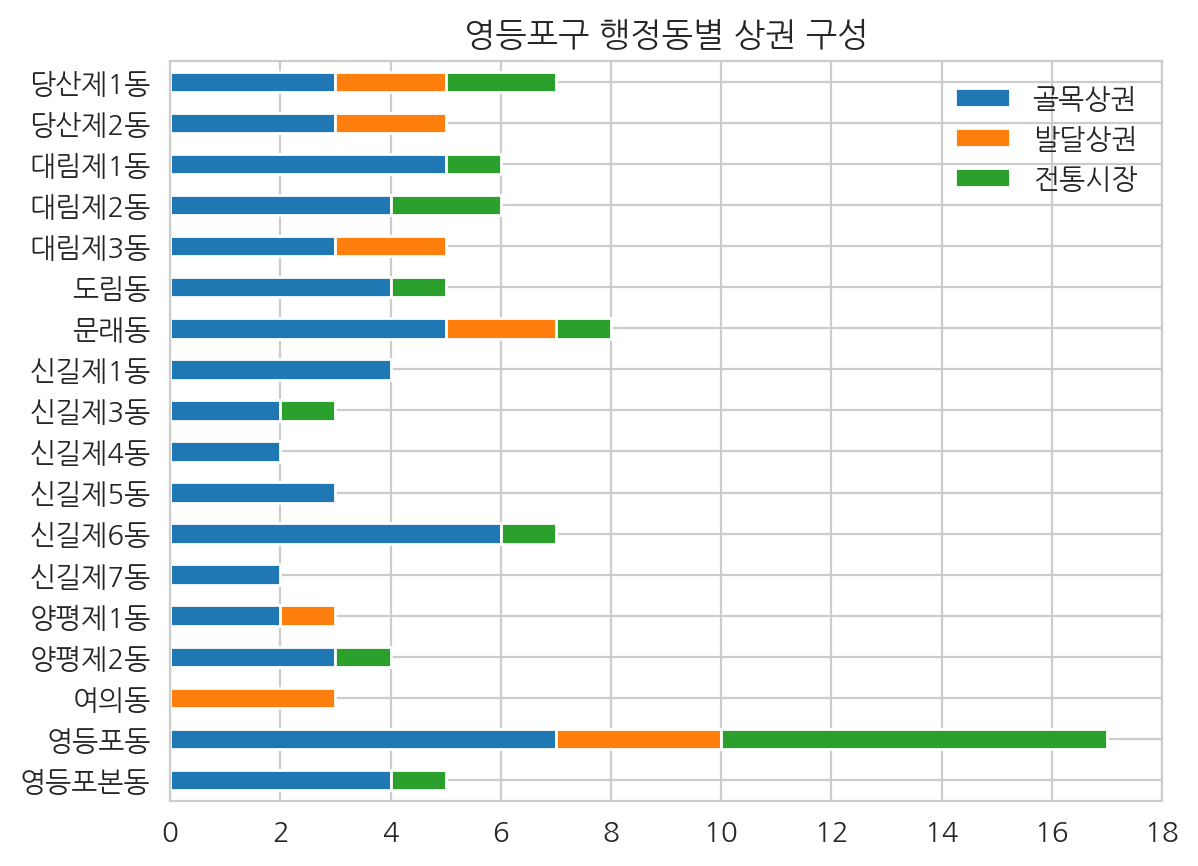

<Figure size 3000x1000 with 0 Axes>

In [ ]:
# 누적막대그래프
pd.pivot_table(data = sggs, index = '읍면동명',columns='상권_구분_코드_명',values="cnt").sort_values(by='읍면동명', ascending=False).plot(kind='barh', stacked=True)
plt.title('영등포구 행정동별 상권 구성')
plt.xticks([0,2,4,6,8,10,12,14,16,18])
plt.ylabel(None)
legend = plt.legend(title='', frameon=False)
plt.figure(figsize=(30,10))
plt.show()

## 4.5. 영등포구 상권 구성 비율

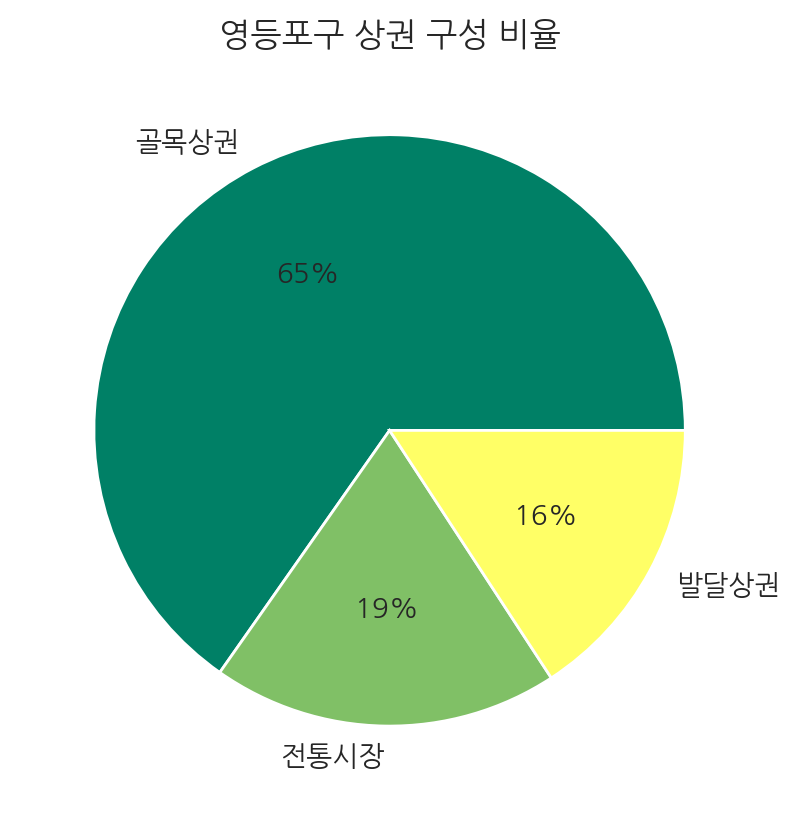

In [ ]:
# 원형 그래프를 통해 상권 비율 확인
a = sg_unique['상권_구분_코드_명'].value_counts().plot.pie(autopct='%1.f%%', colormap='summer')
plt.title('영등포구 상권 구성 비율')
plt.ylabel(None)
plt.show()